In [1]:
import copy
import numpy as np
import pandas as pd
import data_reader as dr

In [2]:
import time

def standardize_tweet_time(created_at_time):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(created_at_time, '%a %b %d %H:%M:%S +0000 %Y'))

In [3]:
obj = dr.DataLoader()
df = obj.load_tweets()

In [4]:
len(df)

302387

In [12]:
df0 = copy.deepcopy(df)
df0['created_at'] = df0['created_at'].apply(standardize_tweet_time)
df0['created_at'] = pd.to_datetime(df0['created_at'], format='%Y-%m-%d %H:%M:%S')

In [18]:
s = pd.to_datetime(df['created_at'])
df1 = s.groupby(s.dt.floor('d')).size().reset_index(name='count')

In [19]:
df1

,created_at,count
0,2020-03-12 00:00:00+00:00,4429
1,2020-03-13 00:00:00+00:00,22260
2,2020-03-14 00:00:00+00:00,21277
3,2020-03-15 00:00:00+00:00,20324
4,2020-03-16 00:00:00+00:00,20064
5,2020-03-17 00:00:00+00:00,17435
6,2020-03-18 00:00:00+00:00,15905
7,2020-03-19 00:00:00+00:00,14320
8,2020-03-20 00:00:00+00:00,10600
9,2020-03-21 00:00:00+00:00,13395


In [20]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

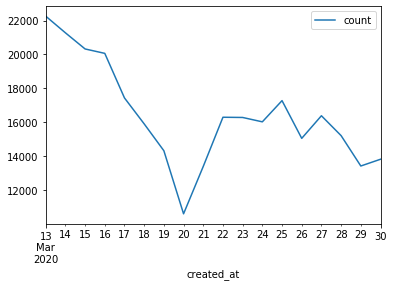

In [31]:
plt.figure()
df1[1:len(df1)-1].plot(x='created_at', y='count')
plt.savefig('output.png')